In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
# from matplotlib.mlab import rec2csv

import emcee
import corner

import _pickle as cPickle
# from astropy.io import ascii

In [7]:
# cat = np.genfromtxt('hercules.dat',names=True)
cat = np.genfromtxt('herculesStrict1603.dat',names=True)

In [8]:
# cmd = np.genfromtxt('/Users/hr8jz/Box/Research/cmds/dart_135_249.cmd',skip_header=8,names=True)
iso = np.genfromtxt('isoHerc.dat',names=True)

In [9]:
cat.dtype.names

('RA', 'DEC', 'Bc', 'Rc')

In [10]:
ra = cat['RA']
dec = cat['DEC']
mB = cat['Bc']
# mB = cat['Bmag']
# dm606 = cat['err_f606w']
mR = cat['Rc']
# mR = cat['mag']
# dm814 = cat['err_f814w']

In [11]:
print(max(ra)-min(ra))
print(max(dec)-min(dec))

0.19814999999999827
0.19313999999999965


In [12]:
# x = cos(dec)*sin(ra-ra0)
# y = sin(dec)*cos(dec0) - cos(dec)*sin(dec0)*cos(ra-ra0)

# central: 16:31:01.99 +12:47:30.12
# central: 16:31:03.12 +12:47:14.01
# central: 16:31:03. +12:47:13.77
# http://www.astrouw.edu.pl/~jskowron/ra-dec/

rat = 247.7625
dect =  12.7871583
# rat = 247.763
# dect =  12.78225

ra0 = 247.7582917 
dec0 = 12.7917

In [13]:
xt = np.cos(np.deg2rad(dect)) * np.sin(np.deg2rad(rat-ra0))
yt = np.sin(np.deg2rad(dect)) * np.cos(np.deg2rad(dec0)) \
    - np.cos(np.deg2rad(dect)) * np.sin(np.deg2rad(dec0)) * np.cos(np.deg2rad(rat-ra0))

print(xt*(3600/0.2255),yt*(3600/0.2255))

1.1434923266799149 -1.265460444117828


In [14]:
x = np.cos(np.deg2rad(dec)) * np.sin(np.deg2rad(ra-ra0))
y = np.sin(np.deg2rad(dec)) * np.cos(np.deg2rad(dec0)) \
    - np.cos(np.deg2rad(dec)) * np.sin(np.deg2rad(dec0)) * np.cos(np.deg2rad(ra-ra0))

# in degrees now 0.2255 arcsec/pixel
# 3600 arcseconds per degree

xpix = np.rad2deg(x) * (3600/0.2255)
ypix = np.rad2deg(y) * (3600/0.2255)

In [15]:
print(np.rad2deg(max(x)-min(x)))

0.1932506262575386


In [16]:
print(max(xpix)-min(xpix))
print(max(ypix)-min(ypix))

3085.15412207157
3083.402167865951


In [17]:
x0 = 0
y0 = 0

In [18]:
# 70 pixels
# 3600/0.225 pixels per degree
7000/3600/0.2255*60         

517.3688100517368

In [19]:
# fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))

# ax1.scatter(-1*xpix[mB < 25.5],ypix[mB < 25.5],s=1)
# # ax1.scatter(xT,yT,s=1)
# ax1.plot(0,0,color='red',marker='o')
# ax2.scatter(ra[mB < 25.5],dec[mB < 25.5],s=1)
# ax2.plot(ra0,dec0,color='red',marker='o')
# ax2.set_xlim(248,247.5)

# plt.show()

In [20]:
xgood = -1*xpix[(mB<=25.5) & (mB-mR <= 1) ]
ygood = ypix[(mB<=25.5) & (mB-mR <= 1)]

In [21]:
mBu = mB[(mB<=25.5) & (mB-mR <= 1) ]
mRu = mR[(mB<=25.5) & (mB-mR <= 1)]

In [22]:
dist = np.sqrt(xgood**2 + ygood**2)

In [23]:
# 5.9 arcminute radius. ->
# # in degrees now 0.2255 arcsec/pixel
# 3600 arcseconds per degree

# calculate distance of each point in pixel space
# convert to arcmin
## convert 5.9' to pixels
# 5.9' * 60 = 354 arcseconds
# 1570 pixels

In [24]:
xuse = xgood[dist <= 1570]
yuse = ygood[dist <= 1570]

In [25]:
# len(xuse)

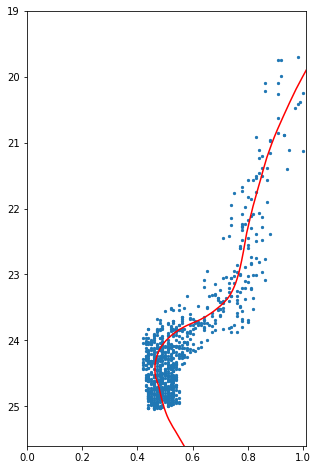

In [26]:
fig, ax = plt.subplots(figsize=(5,8))

ax.scatter(mBu[dist <= 1570]-mRu[dist <= 1570],mRu[dist <= 1570],s=5)
ax.plot(iso['B']-iso['r'],iso['r']+20.625,color='red')

ax.set_ylim(25.6,19)
ax.set_xlim(0,1.01)

plt.show()

In [27]:
xgood = xuse
ygood= yuse

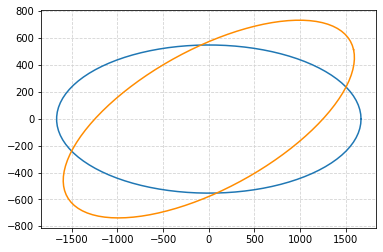

In [28]:
u = 1.2793787463139303
v = -2.6330748750413733
herc_ext = 6.27/60 # degrees
herc_ext_pix = herc_ext*(3600/0.2255)
a = herc_ext_pix
ell = 0.67
b = a*(1-ell)
t_rot = np.deg2rad(-72+90)

t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)],[np.sin(t_rot) , np.cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])

plt.plot( u+Ell[0,:] , v+Ell[1,:] )     #initial ellipse
plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'darkorange' )    #rotated ellipse
plt.grid(color='lightgray',linestyle='--')
plt.show()

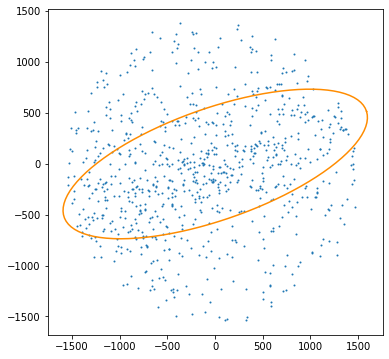

In [29]:
fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(xuse,yuse,s=1)
plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'darkorange' ) 

plt.show()

In [30]:
print(max(yuse))
print(min(yuse))
print(max(xuse))
print(min(xuse))

1377.5949243175678
-1534.9748952315565
1467.182755545922
-1547.2306843788126


In [31]:
# xmin,xmax = 0,5400
# ymin,ymax = 0,5400

xmin,xmax = -1575,1575
ymin,ymax = -1575,1575

nbins = 105
xedge = np.linspace(xmin,xmax,nbins)
yedge = np.linspace(ymin,ymax,nbins)

xcent = (xedge[1:] + xedge[:-1])/2
ycent = (yedge[1:] + yedge[:-1])/2

xdel = xedge[1]-xedge[0]
ydel = yedge[1]-yedge[0]

xx,yy = np.meshgrid(xcent,ycent,indexing='ij')

In [32]:
bkg = 10 # stars per arcmin
bkgAS = bkg * (1/60)**2
bkgPX = bkgAS * (0.2255)**2

In [33]:
0.5e-3 * (1/0.2255)**2 * (60)**2

35.39805605675488

In [34]:
# herc_ext_pix

In [35]:
def median_interval(data, alpha=0.32):
    """
    Median including Bayesian credible interval.

    Parameters
    ----------
    data  : posterior samples
    alpha : 1 - confidence interval

    Returns
    -------
    [med,[lo, hi]] : median, lower, and upper percentiles
    
    """
    q = [100*alpha/2., 50, 100*(1-alpha/2.)]
    lo,med,hi = np.percentile(data,q)
    return [med,[lo,hi]]

In [36]:
def data(x,y):
    """ Calculate the binned data counts. This only needs to be done
    once (not at each model evaluation), but this seemed easier to
    understand if it paralleled the model counts calculation.

    Parameters
    ----------
    x : the x coordinate of the data
    y : the y coordinate of the data

    Returns
    -------
    data_counts : the data counts in each bin
    """
    data_counts,_,_ = np.histogram2d(x,y,bins=[xedge,yedge])
    return data_counts

In [37]:
# data_counts = data(xuse,yuse)
# data_counts_masked = np.copy(data_counts)
# #     data_counts_masked[np.where(MASK==0)] = np.nan
# plt.imshow(data_counts_masked.T,origin='lower')

In [38]:
herc_x0 = xt
herc_y0 = yt

herc_nstar = 1800
herc_ext = 6.27/60 # degrees
herc_ext_pix = herc_ext*(3600/0.2255)
herc_ell = 0.67
herc_pa = -72
# herc_bg = bkgPX

In [39]:
def new_kernel(x,y,lon=herc_x0,lat=herc_y0,ext=herc_ext_pix,ell=herc_ell,pa=herc_pa):
    """ Evaluate the elliptical exponential kernel at coordinates x,y. 
    Normalized to unity over all space...

    Parameters
    ----------
    x: x-coord for evaluating kernel [pix]
    y: y-coord for evaluating kernel [pix]
    lon: x-coord of kernel centroid [pix]
    lat: y-coord of kernel centroid [pix]
    ext: extension [pix]
    ell: ellipticity
    pa:  position angle [deg]

    Returns
    -------
    pdf : probability density (should integrate to unity over all space)
    """

    # Elliptical radius of each x,y coord
    costh = np.cos(np.radians(-pa))
    sinth = np.sin(np.radians(-pa))
    dx = x-lon
    dy = y-lat
    radius = np.sqrt(((dx*costh-dy*sinth)/(1-ell))**2 + (dx*sinth+dy*costh)**2)

    # Exponential radius (re = rh/1.68)
    r_e = ext/1.68 
    #Normalization (integrates to unity over all space) [stars/pix^2)
    norm = 1./(2*np.pi*r_e**2 * (1-ell) )

    # Exponential PDF
    pdf = norm * np.exp(-radius/r_e) # + background

    return pdf

In [40]:
def new_kernel_plummer(x,y,lon=herc_x0,lat=herc_y0,ext=herc_ext_pix,ell=herc_ell,pa=herc_pa):
    """ Evaluate the elliptical Plummer kernel at coordinates x,y. 
    Normalized to unity over all space...

    Parameters
    ----------
    x: x-coord for evaluating kernel [pix]
    y: y-coord for evaluating kernel [pix]
    lon: x-coord of kernel centroid [pix]
    lat: y-coord of kernel centroid [pix]
    ext: extension [pix]
    ell: ellipticity
    pa:  position angle [deg]

    Returns
    -------
    pdf : probability density (should integrate to unity over all space)
    """

    # Elliptical radius of each x,y coord
    costh = np.cos(np.radians(-pa))
    sinth = np.sin(np.radians(-pa))
    dx = x-lon
    dy = y-lat
    radius = np.sqrt(((dx*costh-dy*sinth)/(1-ell))**2 + (dx*sinth+dy*costh)**2)

    #PLUMMER SCALE RADIUS = HALF-LIGHT RADIUS 
    r_e = ext
    #Normalization (integrates to unity over all space?) [stars/pix^2)
    norm = r_e**2/(np.pi*(1-ell))

    # Plummer PDF
    pdf = norm / ((radius**2 + r_e**2)**2)

    return pdf

In [48]:
def model(theta_herc):
    """ Calculate the binned model counts. This extends over the
    entire pixel range, but we will apply the mask later.

    Parameters
    ----------
    theta : the model parameters
    
    Returns
    -------
    model_counts : the model counts in each bin
    """
    #FIT ALL MODEL PARAMETERS
#     richness = theta_herc[0]
    richness = herc_nstar
#     kwargs = dict(lon=theta_herc[1],lat=theta_herc[2],
#                   ext=theta_herc[3],ell=theta_herc[4],
#                   pa=theta_herc[5])
#     kwargs = dict(ext=theta_herc[1],ell=theta_herc[2],
#                   pa=theta_herc[3])
    kwargs = dict(ext=theta_herc[0],ell=theta_herc[1],
                  pa=theta_herc[2])
#     sigma_bg = herc_bg
    sigma_bg = theta_herc[3]
    #THIS CAN BE USED TO HOLD SOME OF THE PARAMETERS FIXED
    # Default values for the other parameters
#     kwargs.update(lat=yt)
#     kwargs.update(lon=xt)
#     kwargs.update(ell=0.67)
#     kwargs.update(ext=herc_ext_pix)
#     kwargs.update(pa=-72)
    

    #CHANGE KERNEL CALLED HERE TO USE A DIFFERENT FUNCTIONAL FORM FOR THE SURFACE DENSITY OF THE GALAXY
    # The new kernel in pixel coordinates
    pdf = new_kernel_plummer(xx,yy,**kwargs)
#     pdf = new_kernel(xx,yy,**kwargs)

    # Calculate the model predicted counts in each pixel
    pixarea = xdel*ydel
    model_counts = richness * pdf * pixarea + sigma_bg
    return model_counts

In [49]:
def lnlike(theta, x, y):
    """ Likelihood function
    Parameters
    ----------
    theta : model parameter array (richness,lon,lat,ext,ell,pa)x2
    x: x-coordinate of data
    y: y-coordinate of data
    
    Returns
    -------
    lnlike: log-likelihood
    """

    #BREAK THETA UP INTO ERI II AND CLUSTER COMPONENTS
    #IF ONLY ONE COMPONENT IS BEING FIT, THEN THESE LINES ARE NOT NEEDED
    theta_sag = theta
    # Calculate the data counts and model predicted counts in each pixel bin
    data_counts = data(x,y)
    model_counts_sag = model(theta_sag)
#     model_counts_cluster = model_cluster(theta_cluster)
    #TO FIT A SINGLE COMPONENT, USE, E.G., MODEL_COUNTS = MODEL_COUNTS_sag
    model_counts = model_counts_sag 
    
    # Apply the mask to the data and model. This selects only pixels
    # in the image for calculating the likelihood.
    data_counts_masked = data_counts
    model_counts_masked = model_counts
    
    # Evaluate Equation C2 from Drlica-Wagner et al. 2020 (1912.03302; ignore k! term)
    lnlike = np.sum(-model_counts_masked + data_counts_masked * np.log(model_counts_masked))
    return lnlike

In [50]:
# herc_x0 = 2386.25
# herc_y0 = 2224.53

# herc_nstar = 1920
# herc_ext = 1.6/60 # degrees
# herc_ext_pix = 2150
# herc_ell = 0.
# herc_pa = 103


herc_x0 = xt
herc_y0 = yt

herc_nstar = 800
herc_ext = 6.27/60 # degrees
herc_ext_pix = herc_ext*(3600/0.2255)
herc_ell = 0.67
herc_pa = -72
herc_bg = bkgPX

In [51]:
herc_bg

0.00014125069444444446

In [52]:
def lnprior(theta):
    """ The log-prior. Add whatever you want here... 
    
    Parameters
    ----------
    theta : model parameters

    Returns
    -------
    lnprior : log-prior
    """
    #PRIORS FOR EACH FITTED PARAMETER
    
# sag_x0 = 2386.25
# sag_y0 = 2224.53

# sag_nstar = 1920
# sag_ext = 1.6/60 # degrees
# sag_ext_pix = 2150
# sag_ell = 0.
# sag_pa = 103
    #TO REMOVE ANY PARAMETER FROM THE FIT, REMOVE IT FROM THE LINE BELOW AND ELIMINATE THE CONSTRAINT FOR IT
#     rich1,lon1,lat1,ext1,ell1,pa1,bg1= theta[0],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6]
    ext1,ell1,pa1,bg1= theta[0],theta[1],theta[2],theta[3]
#     rich1,ext1,ell1= theta[0],theta[1],theta[2]
#     rich1,ell1= theta[0],theta[1]
#     rich1,ext1,ell1,pa1= theta[0],theta[1],theta[2],theta[3]
#     rich1,lon1,lat1,ell1 = theta[0],theta[1],theta[2],theta[3]
#     rich1,lon1,lat1,ext1,bg1 = theta[0],theta[1],theta[2],theta[3],theta[4]

## February beginning MCMC
#     if not (100 < rich1 < 10000):  return np.inf
#     if not (1000 < lon1 < 5000): return np.inf
#     if not (1000 < lat1 < 5000): return np.inf
#     if not (1000 < ext1 < 6000): return np.inf
#     if not (0. <= ell1 < 0.6): return np.inf
#     if not (1 <= pa1 <= 110): return np.inf

#     if not (500 < rich1 < 8000):  return np.inf
#     if not (-500 < lon1 < 500): return np.inf
#     if not (-500 < lat1 < 500): return np.inf
    if not (0 < ext1 < 5000): return np.inf
    if not (0.1 <= ell1 <= 0.9): return np.inf
    if not (-110 <= pa1 <= -50): return np.inf
    if not (0 < bg1 < 0.5e-3): return np.inf

    return 0

In [53]:
def lnprob(theta, x, y):
    """ The log-probability = lnlike + lnprob 

    Parameters
    ----------
    theta : the model parameter vector
    x     : x-coord of the data
    y     : y-coord of the data
    
    Returns
    -------
    lnprob : log-probability
    """
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y)

Running mcmc...


/Users/hr8jz/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/Users/hr8jz/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


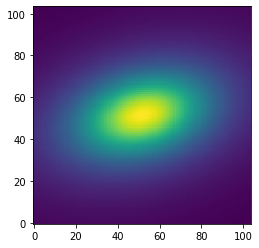

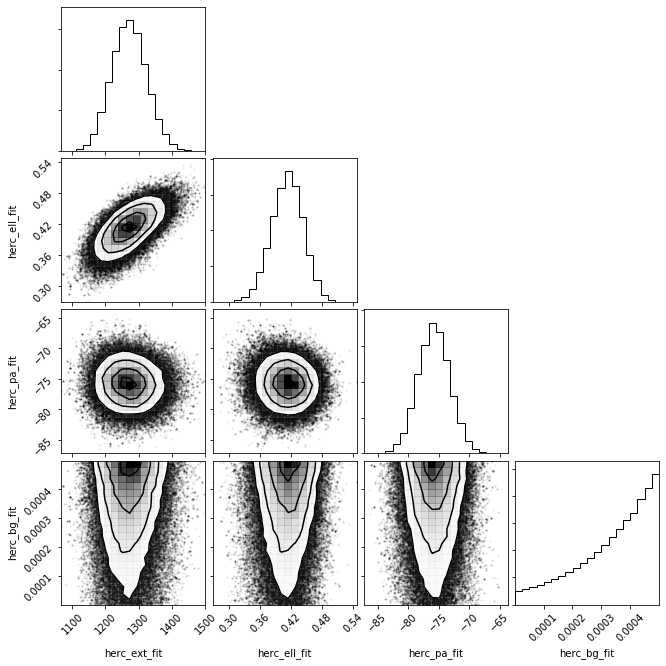

In [54]:
#FLAG FOR DISPLAYING PLOTS
do_plot=True
save_plot=True

#SET INITIAL GUESSES FOR PARAMETERS (ANY PARAMETERS NOT BEING FIT SHOULD BE REMOVED HERE)
# THETA = [herc_nstar,herc_x0,herc_y0,herc_ext_pix,herc_ell,herc_pa,herc_bg]
THETA = [herc_ext_pix,herc_ell,herc_pa,herc_bg]
# THETA = [herc_nstar,herc_ext_pix,herc_ell]
# THETA = [herc_nstar,herc_ell]

#PLOT (MASKED, BINNED) OBSERVED SURFACE DENSITY
if do_plot:
    # Example of the masked counts and data
    # (transpose due to difference between imshow and histogram2d...)
    data_counts = data(xuse,yuse)
    data_counts_masked = np.copy(data_counts)
#     data_counts_masked[np.where(MASK==0)] = np.nan
    plt.imshow(data_counts_masked.T,origin='lower')
    if save_plot:
        plt.savefig('data_counts_masked_hercBG1703_1.png')

# Initialize and run the mcmc
print("Running mcmc...")
ndim, nwalkers = len(THETA), 100
nthreads,nsamples = 16, 3000  # nsamples =steps that walker takes before stopping
nburn = 1000

pos = [THETA + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
     
sampler = emcee.EnsembleSampler(nwalkers,ndim,lnprob,args=(xuse,yuse),
                                threads=nthreads)
sampler.run_mcmc(pos,nsamples)
     
samples = sampler.chain[:, nburn:, :].reshape((-1, ndim))

#MEDIAN VALUES AND +/-1 SIGMA FOR EACH FIT PARAMETER
# rich,[rich_min,rich_max] = median_interval(samples[:,0])
# x,[xmin,xmax] = median_interval(samples[:,1])
# y,[ymin,ymax] = median_interval(samples[:,2])
herc_ext_fit,[herc_ext_min,herc_ext_max] = median_interval(samples[:,0])
herc_ell_fit,[herc_ell_min,herc_ell_max] = median_interval(samples[:,1])
herc_pa_fit,[herc_pa_min,herc_pa_max] = median_interval(samples[:,2])
herc_bg_fit,[herc_bg_min,herc_bg_max] = median_interval(samples[:,3])


if do_plot:
#     theta_herc = [rich,x,y,herc_ext_fit,herc_ell_fit,herc_pa_fit,herc_bg_fit]
    theta_herc = [herc_ext_fit,herc_ell_fit,herc_pa_fit,herc_bg_fit]
#     theta_herc = [rich,herc_ext_fit,herc_ell_fit]
#     theta_herc = [rich,herc_ell_fit]
#     theta_herc = [rich,x,y,herc_ext_fit,herc_bg_fit]
    model_counts_herc = model(theta_herc)
    model_counts = model_counts_herc #+ model_counts_cluster
    model_counts_masked = np.copy(model_counts)
#     model_counts_masked[np.where(MASK==0)] = np.nan
#PLOT (MASKED, BINNED) MODEL SURFACE DENSITY
    plt.imshow(model_counts_masked.T,origin='lower')
    if save_plot:
        plt.savefig('model_counts_masked_hercBG1703_1.png')

#CORNER PLOT    
#     fig = corner.corner(samples, labels=["rich", "x", "y", 
#                                          "herc_ext_fit", 
#                                          "herc_ell_fit", 
#                                          "herc_pa_fit","herc_bg_fit"])
    fig = corner.corner(samples, labels=["herc_ext_fit", 
                                         "herc_ell_fit", 
                                         "herc_pa_fit","herc_bg_fit"])
#     fig = corner.corner(samples, labels=["rich", 
#                                          "herc_ext_fit", 
#                                          "herc_ell_fit"])
#     fig = corner.corner(samples, labels=["rich","herc_ell_fit"])

    if save_plot:
        fig.savefig("triangle_hercBG1703_1.png")

cPickle.dump(samples, open( "hercMcmc1703_1.p", "wb" ) )
#1:05 AM

In [ ]:
#EXAMINE RESIDUALS NEAR THE CENTER OF THE GALAXY
plt.imshow(model_counts.T-data_counts.T,origin="lower")
plt.colorbar()
plt.xlim(0,105)
plt.ylim(0,105)
plt.clim(-2.5,2.5)

In [ ]:
samples = cPickle.load( open( "hercMcmc0403-BGe67pam72.p", "rb" ) )
#MEDIAN VALUES AND +/-1 SIGMA FOR EACH FIT PARAMETER
rich,[rich_min,rich_max] = median_interval(samples[:,0])
x,[xmin,xmax] = median_interval(samples[:,1])
y,[ymin,ymax] = median_interval(samples[:,2])
herc_ext_fit,[herc_ext_min,herc_ext_max] = median_interval(samples[:,3])
herc_bg_fit,[herc_bg_min,herc_bg_max] = median_interval(samples[:,4])
# herc_pa_fit,[herc_pa_min,herc_pa_max] = median_interval(samples[:,5])

In [55]:
# 0.2255 arcsec per pix

conv = 0.2255/60 # pix to arcmin

In [57]:
# res = [rich,rich_max-rich,rich-rich_min,x,xmax-x,x-xmin,y,ymax-y,y-ymin,
#            herc_ext_fit,herc_ext_max-herc_ext_fit,herc_ext_fit-herc_ext_min,
#            herc_ell_fit,herc_ell_max-herc_ell_fit,herc_ell_fit-herc_ell_min,
#            herc_pa_fit,herc_pa_max-herc_pa_fit,herc_pa_fit-herc_pa_min,
#            herc_bg_fit,herc_bg_max-herc_bg_fit,herc_bg_fit-herc_bg_min]

# res = [rich,rich_max-rich,rich-rich_min,x,xmax-x,x-xmin,y,ymax-y,y-ymin,
#            herc_ext_fit*conv,herc_ext_max*conv-herc_ext_fit*conv,herc_ext_fit*conv-herc_ext_min*conv,
#            herc_ell_fit,herc_ell_max-herc_ell_fit,herc_ell_fit-herc_ell_min,
#            herc_pa_fit,herc_pa_max-herc_pa_fit,herc_pa_fit-herc_pa_min]

# res = [rich,rich_max-rich,rich-rich_min,x,xmax-x,x-xmin,y,ymax-y,y-ymin,
#            herc_ext_fit*conv,herc_ext_max*conv-herc_ext_fit*conv,herc_ext_fit*conv-herc_ext_min*conv,
#            herc_ell_fit,herc_ell_max-herc_ell_fit,herc_ell_fit-herc_ell_min,
#        herc_pa_fit,herc_pa_max-herc_pa_fit,herc_pa_fit-herc_pa_min,
#       herc_bg_fit,herc_bg_max-herc_bg_fit,herc_bg_fit-herc_bg_min]
# res = [rich,rich_max-rich,rich-rich_min,
#            herc_ext_fit*conv,herc_ext_max*conv-herc_ext_fit*conv,herc_ext_fit*conv-herc_ext_min*conv,
#            herc_ell_fit,herc_ell_max-herc_ell_fit,herc_ell_fit-herc_ell_min,
#        herc_pa_fit,herc_pa_max-herc_pa_fit,herc_pa_fit-herc_pa_min,
#       herc_bg_fit,herc_bg_max-herc_bg_fit,herc_bg_fit-herc_bg_min]

res = [herc_ext_fit*conv,herc_ext_max*conv-herc_ext_fit*conv,herc_ext_fit*conv-herc_ext_min*conv,
           herc_ell_fit,herc_ell_max-herc_ell_fit,herc_ell_fit-herc_ell_min,
       herc_pa_fit,herc_pa_max-herc_pa_fit,herc_pa_fit-herc_pa_min,
       herc_bg_fit,herc_bg_max-herc_bg_fit,herc_bg_fit-herc_bg_min]

print(res)

[4.774022432264026, 0.20048759591655863, 0.19687377466574318, 0.41292740719948406, 0.029645024638343398, 0.03178063117608787, -75.81401154265063, 2.567940356409693, 2.587219383128371, 0.00037045284155970724, 9.553664767622945e-05, 0.00017227072903889216]


In [58]:
0.0003704*(1/0.2255)**2 * 60**2

26.22287992684402

In [ ]:
fig = corner.corner(samples, labels=["rich", "x", "y","herc_ext_fit"])

In [ ]:
fig.savefig("triangle_hercBG1103_2.png")

In [ ]:
samples = cPickle.load( open( "sag2mcmc.p", "rb" ) )
#MEDIAN VALUES AND +/-1 SIGMA FOR EACH FIT PARAMETER
rich,[rich_min,rich_max] = median_interval(samples[:,0])
x,[xmin,xmax] = median_interval(samples[:,1])
y,[ymin,ymax] = median_interval(samples[:,2])
sag2_ext_fit,[sag2_ext_min,sag2_ext_max] = median_interval(samples[:,3])
sag2_ell_fit,[sag2_ell_min,sag2_ell_max] = median_interval(samples[:,4])
sag2_pa_fit,[sag2_pa_min,sag2_pa_max] = median_interval(samples[:,5])

res = [rich,rich_min,rich_max,x,xmin,xmax,y,ymin,ymax,sag2_ext_fit,sag2_ext_min,sag2_ext_max,\
       sag2_ell_fit,sag2_ell_min,sag2_ell_max,sag2_pa_fit,sag2_pa_min,sag2_pa_max]#,rich_cluster,rich_cluster_min,rich_cluster_max,x_cluster,x_cluster_min,x_cluster_max,y_cluster,y_cluster_min,y_cluster_max,cluster_ext_fit,cluster_ext_min,cluster_ext_max,cluster_ell_fit,cluster_ell_min,cluster_ell_max,cluster_pa_fit,cluster_pa_min,cluster_pa_max]
# results.append(res)

In [ ]:
xorig = cat['x_f606w']
yorig = cat['y_f606w']
m606 = cat['magr_f606w']
dm606 = cat['err_f606w']
m814 = cat['magr_f814w']
dm814 = cat['err_f814w']

In [ ]:
# BEST-FIT sag2 I PARAMETERS (FROM MCMC_STRUCTURAL_FIT)
# richness = rich
# x0 = x
# y0 = y
# gal_ext_pix = sag2_ext_fit

# gal_ell = sag2_ell_fit
# gal_pa = sag2_pa_fit

richness = 6071
x0 = 2527
y0 = 2235
gal_ext_pix = 2677

gal_ell = 0.14
gal_pa = -8

In [ ]:
xbin0 = np.ones((179,1))  # (fltarr(267)+1)
xbin1 = np.ones((1,179))  
xbin1[0] = np.arange(0,179,1)
xbin2 = xbin1 * 30 + 15  # (findgen(267)*30. + 15)
xbin = np.matmul(xbin0,xbin2)
ybin = xbin.T

# creating x and y arrays to represent the bins across the image

In [ ]:
costh = np.cos(-1 * np.deg2rad(gal_pa))
sinth = np.sin(-1 * np.deg2rad(gal_pa))

dx = xbin - x0
dy = ybin - y0

In [ ]:
r1 = (dx * costh - dy * sinth) / (1 - gal_ell)
r2 = (dx * sinth + dy * costh)

radius = np.sqrt(r1**2 + r2**2)
# calculating distances to different bins in the annuli based on the PA

In [ ]:
r_h = gal_ext_pix
norm = r_h**2 / (np.pi * (1-gal_ell))
# half light radius squared / (pi * 1-ell)
pdf = norm/((radius**2 + r_h**2)**2)

In [ ]:
xdel = 30.
ydel = 30.
pixarea = xdel*ydel  # pixel area in each bin

In [ ]:
model_counts_gal = richness*pdf*pixarea  # a 267x267 array

In [ ]:
# Observed surface density map
binned_surface_density_30 = np.zeros((179,179))
for ii in range(179):
    for jj in range(179):
        idxgood = np.logical_and(np.logical_and(xgood >= (30 * ii),xgood <= (30 * (ii + 1))),
                     np.logical_and(ygood >= (30 * jj),ygood <= (30 * (jj + 1))))

        tmp = np.where(idxgood)[0]
#         # flipping ii and jj because in IDL, it's col, row.
        binned_surface_density_30[jj,ii] = len(tmp)

In [ ]:
# Define annuli
radius1=radius.flatten()
r1 = np.where(radius1 < (0.1 * r_h))
r2 = np.where((radius1 < (0.2 * r_h)) & (radius1 >= (0.1 * r_h)))
r3 = np.where((radius1 < (0.3 * r_h)) & (radius1 >= (0.2 * r_h)))
r4 = np.where((radius1 < (0.4 * r_h)) & (radius1 >= (0.3 * r_h)))
r5 = np.where((radius1 < (0.5 * r_h)) & (radius1 >= (0.4 * r_h)))
r6 = np.where((radius1 < (0.6 * r_h)) & (radius1 >= (0.5 * r_h)))
r7 = np.where((radius1 < (0.7 * r_h)) & (radius1 >= (0.6 * r_h)))
r8 = np.where((radius1 < (0.8 * r_h)) & (radius1 >= (0.7 * r_h)))
r9 = np.where((radius1 < (0.9 * r_h)) & (radius1 >= (0.8 * r_h)))
r10 = np.where((radius1 < r_h) & (radius1 >= (0.9 * r_h)))

In [ ]:
# To get the actual indices
r1v = r1[0]
r2v = r2[0]
r3v = r3[0]
r4v = r4[0]
r5v = r5[0]
r6v = r6[0]
r7v = r7[0]
r8v = r8[0]
r9v = r9[0]
r10v = r10[0]

In [ ]:
# r_annuli = (findgen(10) + 0.05)*r_h
# area_annuli = !pi*( (r_annuli + 0.05)^2 - (r_annuli - 0.05)^2)

# r_h is in pixels
# area is pixel squared
# pixel squared to arcmin squared... how many pixels in an arcmin?
# 20 pixels per arcsec, 1200 pixels=1 arcmin
# 1 arcmin squared : 1200^2 pixels

# arr = np.arange(0,10,1)
arr = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
r_annuli = (arr + 0.05) * r_h

# .05r_h, .15r_h
area_annuli = np.pi * ( (r_annuli + (0.05*r_h))**2 - (r_annuli - (0.05*r_h))**2) * (1-gal_ell)

In [ ]:
r_annuli

In [ ]:
area_annuli

In [ ]:
pix_per_arcsec=20
area_arcmin = area_annuli/(pix_per_arcsec*60)**2

In [ ]:
area_arcmin

In [ ]:
aa = area_arcmin

In [ ]:
dist_x = np.array([r_h*0.1,r_h*0.2,r_h*0.3,r_h*0.4,r_h*0.5,r_h*0.6,r_h*0.7,r_h*0.8,r_h*0.9,r_h])/1200

In [ ]:
binned_surface_density_30f = binned_surface_density_30.flatten()
model_counts_galf = model_counts_gal.flatten()
# model_counts_expf = model_counts_exp.flatten()
data_1d = [binned_surface_density_30f[r1v].sum()/aa[0],
           binned_surface_density_30f[r2v].sum()/aa[1],
           binned_surface_density_30f[r3v].sum()/aa[2],
           binned_surface_density_30f[r4v].sum()/aa[3],
           binned_surface_density_30f[r5v].sum()/aa[4],
           binned_surface_density_30f[r6v].sum()/aa[5],
           binned_surface_density_30f[r7v].sum()/aa[6],
           binned_surface_density_30f[r8v].sum()/aa[7],
           binned_surface_density_30f[r9v].sum()/aa[8],
           binned_surface_density_30f[r10v].sum()/aa[9]]

model_1d = [model_counts_galf[r1v].sum()/aa[0],
            model_counts_galf[r2v].sum()/aa[1],
            model_counts_galf[r3v].sum()/aa[2],
            model_counts_galf[r4v].sum()/aa[3],
            model_counts_galf[r5v].sum()/aa[4],
            model_counts_galf[r6v].sum()/aa[5],
            model_counts_galf[r7v].sum()/aa[6],
            model_counts_galf[r8v].sum()/aa[7],
            model_counts_galf[r9v].sum()/aa[8],
            model_counts_galf[r10v].sum()/aa[9]]

# model_1de = [model_counts_expf[r1ve].sum()/a1,
#             model_counts_expf[r2ve].sum()/a2,
#             model_counts_expf[r3ve].sum()/a3,
#             model_counts_expf[r4ve].sum()/a4,
#             model_counts_expf[r5ve].sum()/a5,
#             model_counts_expf[r6ve].sum()/a6,
#             model_counts_expf[r7ve].sum()/a7,
#             model_counts_expf[r8ve].sum()/a8,
#             model_counts_expf[r9ve].sum()/a9,


In [ ]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(dist_x,data_1d,label='Data')
ax.plot(dist_x,model_1d,label='Model Plummer')
# ax.plot(dist_x,model_1de,label='Model Exp')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'log[$\Sigma_N$ (stars arcmin$^{-2}$)]',fontsize=16)
ax.set_xlabel(r'log[R (arcmin)]',fontsize=16)
ax.set_title('Sgr II',fontsize=20)

ax.set_xticks([1, 2])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_yticks([1e+2, 1e+3])
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.legend()
plt.savefig('figures/sgr2_1102.png')
plt.show()

In [ ]:
print(res)

In [ ]:
4801-5420

In [ ]:
#dummy

In [ ]:
for i in range(0,nwalkers-1):
    plt.plot(sampler.chain[i,:,1],linewidth=1,color='black')

In [ ]:
#EXAMINE RESIDUALS NEAR THE CENTER OF THE GALAXY
plt.imshow(model_counts.T*(1-gap_mask.T)-data_counts.T*(1-gap_mask.T),origin="lower")
plt.colorbar()
plt.xlim(70,170)
plt.ylim(70,170)
plt.clim(-2.5,2.5)